# Project 3 - Interpolation (Nappe flow)
[Aminata Ndiaye] - 15 March 2024 - CEE 303 - Computational methods ::::: Collaborators: Mariana Fernedez

## Problem setup

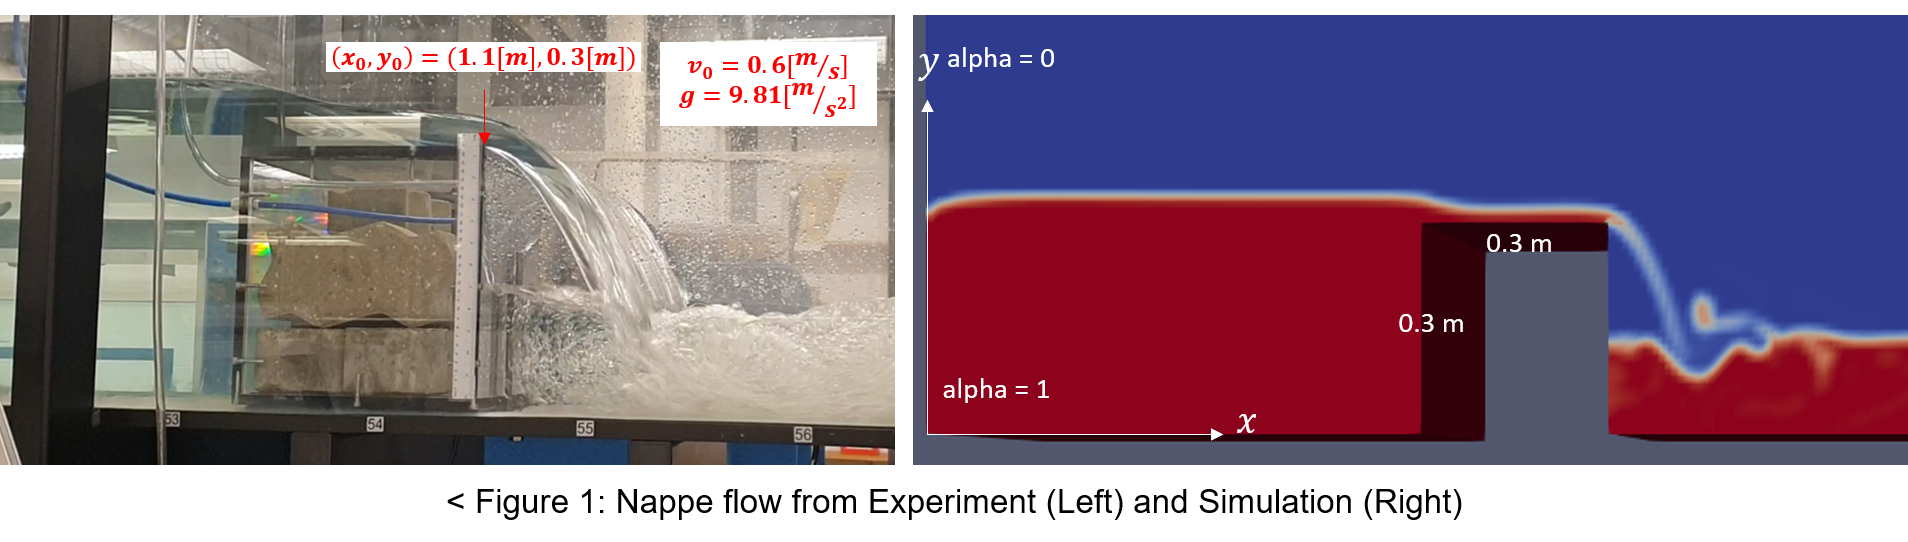

When designing breakwater to reduce the damage from extreme events like tsunamis, coastal engineers must consider the effects of nappe flow. It is because nappe flow can increase the damage by creating an additional force. One of the research interests of Taeksang Kim, Ph.D. Candidate from CEE Hydraulic Lab, is to estimate the trajectory of nappe flow for both aerated and non-aerated scenarios by changing the water flowrate.
In the case of an aerated scenario, air can be entrained into the space below nappe flow through a PVC tube. Thus, there is no pressure difference between the cavity (the space below nappe flow) and the atmosphere. For this reason, we can assume that the only force acting on the nappe flow is gravity and thus motion of the nappe flow is a projectile motion shown as equation (1) and (2).
 
- For motion in the horizontal direction during time $t$
$$ x=x_{0}+v_{0} t \;\;\;\;\; (Eq. 1) $$ 

- For motion in the vertical direction during time $t$
$$ y=y_{0}-\frac{1}{2}g t^{2} \;\;\;\;\; (Eq. 2) $$

-------------------------------------------------------------------------------------------------------------------------------
From the hydraulic experiment and simulation results, Taeksang obtained the fluid properties at different points shown in the Figure 2. For part 1 to 3, you will be using points from Figure 2 to interpolate intermediate values.

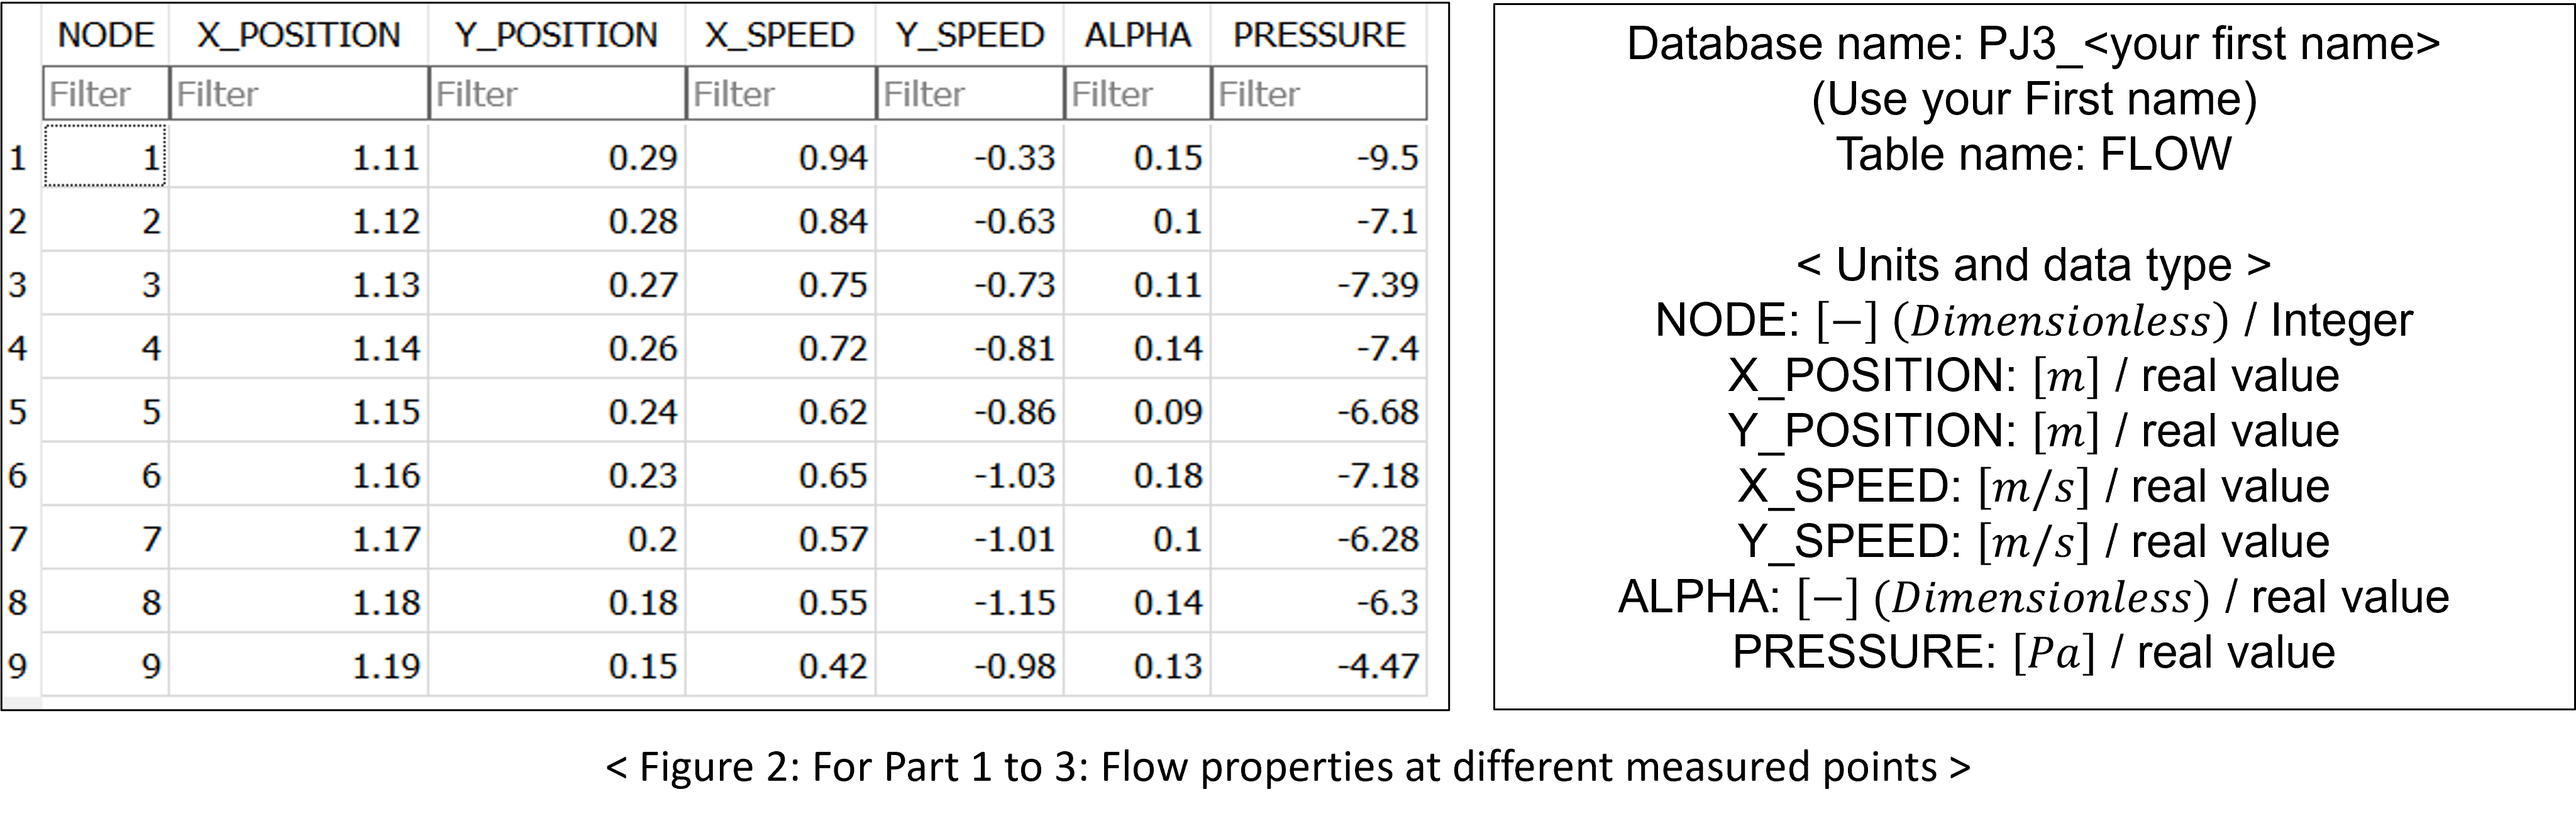

ALPHA is the function of air density and water density, $ \alpha=f(\rho_{air},\rho_{water})$. When $ \alpha=0 $, the density at this point equals the density of air, $ \rho=\rho_{air} $. On the contrary, when $ \alpha=1 $, the density at this point equals the density of water, $ \rho=\rho_{water} $.

-------------------------------------------------------------------------------------------------------------------------------
For part 4, you will be using a different database file (file name: 'DB2.db') on Canvas which contains the table (table name: BILINEAR) as shown in Figure 3, you don't need to create a new database and table for this part.

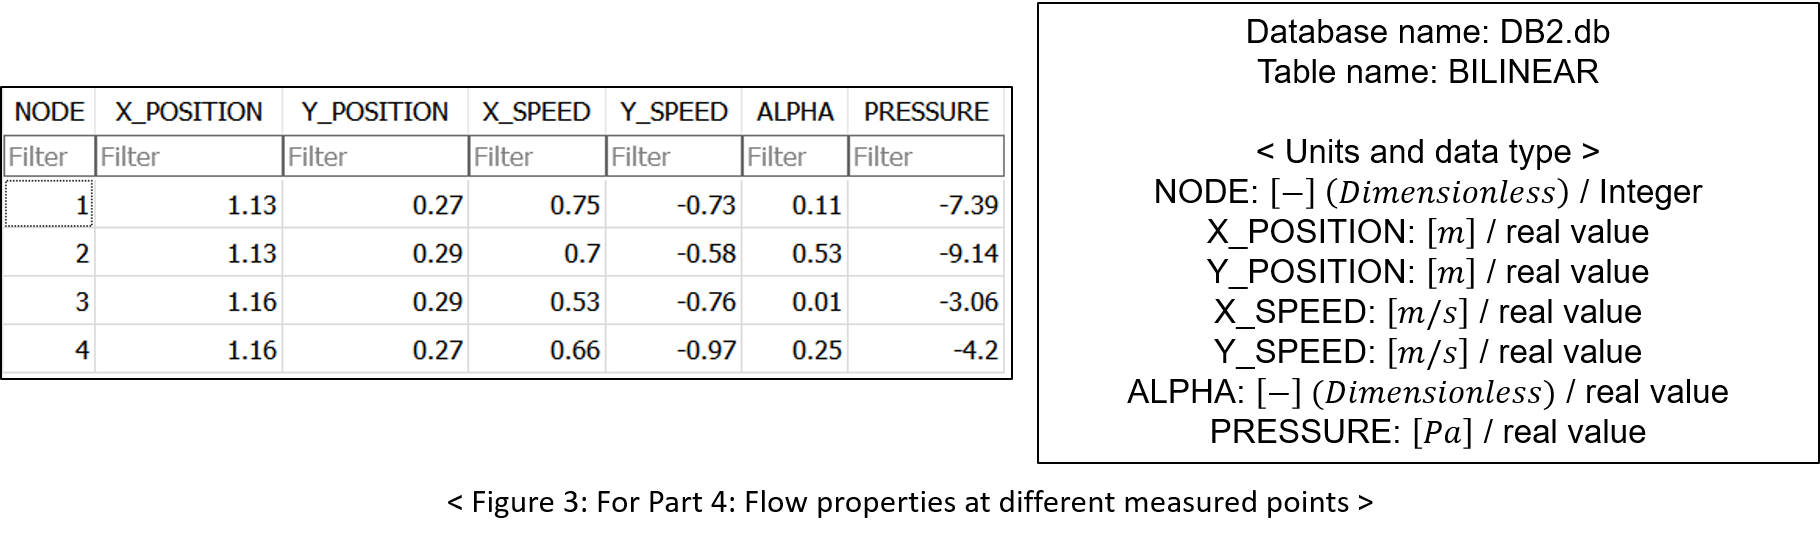

(1) Create a database and table with the given information in the Figure 2. You should use the SQLite3 to create them. You can freely use the code I provide on Canvas. You don't need to include the unit in the table for this part.

(2) Derive an analytical trajectory equation using Equation (1) and (2) and plot this analytical trajectory equation. For this part, you have to express $y$ as a function of $x$. Use the $x$ array with $x_{lower bound}=1.11[m]$, $x_{upper bound}=1.20[m]$, and $dx=0.001[m]$ to plot the trajectory.

(3a) Create a Python function that implements Newton's second order interpolating polynomial and then estimate $y$ at $x=1.125[m]$ using the 3 different points, $y(x=1.11[m])=0.29[m], \; y(x=1.15[m])=0.24[m], \; y(x=1.19[m])=0.15[m]$. For this part, you have to extract the information from the table in the database. 

(3b) Create a Python function that implements Newton's third order interpolating polynomial and then estimate $y$ at $x=1.125[m]$ using the 4 different points, $y(x=1.12[m])=0.28[m], \; y(x=1.14[m])=0.26[m], \; y(x=1.16[m])=0.23[m], \; y(x=1.18[m])=0.18[m]$. For this part, you have to extract the information from the table in the database. 

(4) Estimate the X_SPEED, Y_SPEED, ALPHA, and PRESSURE at point $(x,y)=(1.14[m],0.28[m])$ using the bilinear interpolation. For this part, you have to use a different database file, 'DB2.db' and should extract the information from the table in this database.

## Solution

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sqlite3

## Step 1: Create a database and table with given infromation
To create the database and table, I used the given code and adapted the code for the hydraulic experiment and simulation results.

In [3]:
#create database file 
conn = sqlite3.connect('PJ3_Aminata.db') 
print("Opened successfully")

# Cursor allow us to send SQL statements to a SQLite database
cursor = conn.cursor()

# Drop the Table FLOW if exists
cursor.execute('DROP TABLE IF EXISTS FLOW')

# To create the Table FLOW
cursor.execute('''
    CREATE TABLE FLOW (
    NODE int primary key,
    X_POSITION real,
    Y_POSITION real,    
    X_SPEED real,
    Y_SPEED real, 
    ALPHA real, 
    PRESSURE real)''')
print("----------Table created successfully----------")

# To create records in the FLOW table
cursor.execute("INSERT INTO FLOW (NODE, X_POSITION, Y_POSITION, X_SPEED, Y_SPEED, ALPHA, PRESSURE) \
      VALUES (1, 1.11, 0.29, 0.94, -0.33, 0.15, -9.5)")
cursor.execute("INSERT INTO FLOW (NODE, X_POSITION, Y_POSITION, X_SPEED, Y_SPEED, ALPHA, PRESSURE) \
      VALUES (2, 1.12, 0.28, 0.84, -0.63, 0.1, -7.1)")
cursor.execute("INSERT INTO FLOW (NODE, X_POSITION, Y_POSITION, X_SPEED, Y_SPEED, ALPHA, PRESSURE) \
      VALUES (3, 1.13, 0.27, 0.75, -0.73, 0.11, -7.39)")
cursor.execute("INSERT INTO FLOW (NODE, X_POSITION, Y_POSITION, X_SPEED, Y_SPEED, ALPHA, PRESSURE) \
      VALUES (4, 1.14, 0.26, 0.72, -0.81, 0.14, -7.4)")
cursor.execute("INSERT INTO FLOW (NODE, X_POSITION, Y_POSITION, X_SPEED, Y_SPEED, ALPHA, PRESSURE) \
      VALUES (5, 1.15, 0.24, 0.62, -0.86, 0.09, -6.68)")
cursor.execute("INSERT INTO FLOW (NODE, X_POSITION, Y_POSITION, X_SPEED, Y_SPEED, ALPHA, PRESSURE) \
      VALUES (6, 1.16, 0.23, 0.65, -1.03, 0.18, -7.18)")
cursor.execute("INSERT INTO FLOW (NODE, X_POSITION, Y_POSITION, X_SPEED, Y_SPEED, ALPHA, PRESSURE) \
       VALUES (7, 1.17, 0.2, 0.57, -1.01, 0.1, -6.28)")
cursor.execute("INSERT INTO FLOW (NODE, X_POSITION, Y_POSITION, X_SPEED, Y_SPEED, ALPHA, PRESSURE) \
       VALUES (8, 1.18, 0.18, 0.55, -1.15, 0.14, -6.3)")
cursor.execute("INSERT INTO FLOW (NODE, X_POSITION, Y_POSITION, X_SPEED, Y_SPEED, ALPHA, PRESSURE) \
       VALUES (9, 1.19, 0.15, 0.42, -0.98, 0.13, -4.47)")

conn.commit()
print("----------Records created successfully----------")

# To display records from the WEATHER table created in the above
cursor = cursor.execute("SELECT NODE,X_POSITION,Y_POSITION, X_SPEED, Y_SPEED, ALPHA, PRESSURE from FLOW")

for row in cursor:
    print("NODE = ", row[0])
    print("X_POSITION = ", row[1])
    print("Y_POSITION = ", row[2])
    print("X_SPEED = ", row[3] )
    print("Y_SPEED = ", row[4] )
    print("ALPHA = ", row[5] )
    print("PRESSURE = ", row[6] )
print("----------Display records successfully----------")

cursor.execute('SELECT * FROM FLOW')
data = cursor.fetchall()
conn.close()
print("----------Closed database successfully----------")

Opened successfully
----------Table created successfully----------
----------Records created successfully----------
NODE =  1
X_POSITION =  1.11
Y_POSITION =  0.29
X_SPEED =  0.94
Y_SPEED =  -0.33
ALPHA =  0.15
PRESSURE =  -9.5
NODE =  2
X_POSITION =  1.12
Y_POSITION =  0.28
X_SPEED =  0.84
Y_SPEED =  -0.63
ALPHA =  0.1
PRESSURE =  -7.1
NODE =  3
X_POSITION =  1.13
Y_POSITION =  0.27
X_SPEED =  0.75
Y_SPEED =  -0.73
ALPHA =  0.11
PRESSURE =  -7.39
NODE =  4
X_POSITION =  1.14
Y_POSITION =  0.26
X_SPEED =  0.72
Y_SPEED =  -0.81
ALPHA =  0.14
PRESSURE =  -7.4
NODE =  5
X_POSITION =  1.15
Y_POSITION =  0.24
X_SPEED =  0.62
Y_SPEED =  -0.86
ALPHA =  0.09
PRESSURE =  -6.68
NODE =  6
X_POSITION =  1.16
Y_POSITION =  0.23
X_SPEED =  0.65
Y_SPEED =  -1.03
ALPHA =  0.18
PRESSURE =  -7.18
NODE =  7
X_POSITION =  1.17
Y_POSITION =  0.2
X_SPEED =  0.57
Y_SPEED =  -1.01
ALPHA =  0.1
PRESSURE =  -6.28
NODE =  8
X_POSITION =  1.18
Y_POSITION =  0.18
X_SPEED =  0.55
Y_SPEED =  -1.15
ALPHA =  0.14
PRES

**ANS #1 is the code above that creates the database and table. Also, ANS #1 is the image below that shows the output of the code from the SQL software.** <br/>
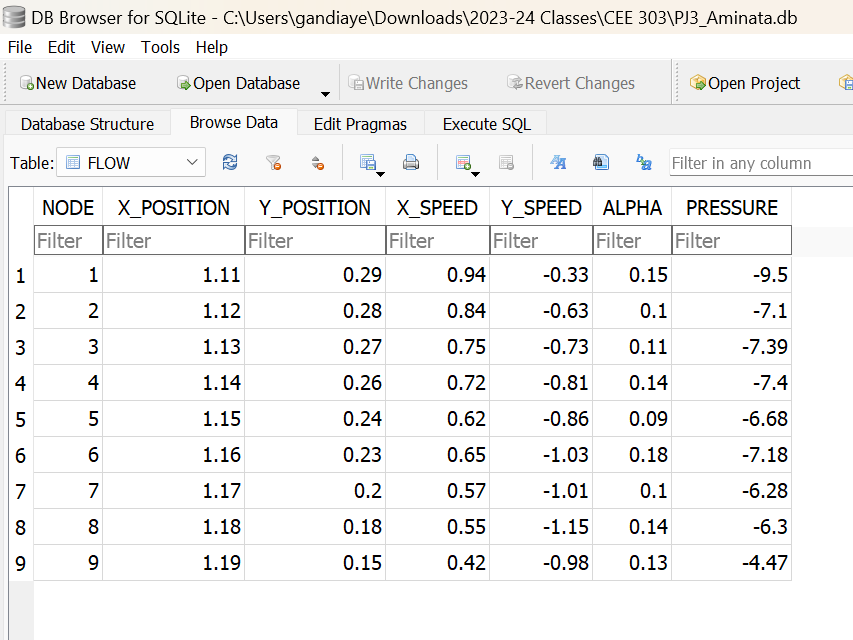

## Step 2: Derive analytical trajectory equation and plot the equation.

To derive the analytical trajectory equation, I used the given equation 1 and equation 2. <br/>
- For motion in the horizontal direction during time $t$
$$ x=x_{0}+v_{0} t \;\;\;\;\; (Eq. 1) $$ 

- For motion in the vertical direction during time $t$
$$ y=y_{0}-\frac{1}{2}g t^{2} \;\;\;\;\; (Eq. 2) $$

I solved equation 1 for variable t. This allowed me to get the equation in terms of x. I then substituded this re-arranged equation in for the t varaible in equation 2. This allowed me to express equation 2, y, as a function of x. The image below shows this work.

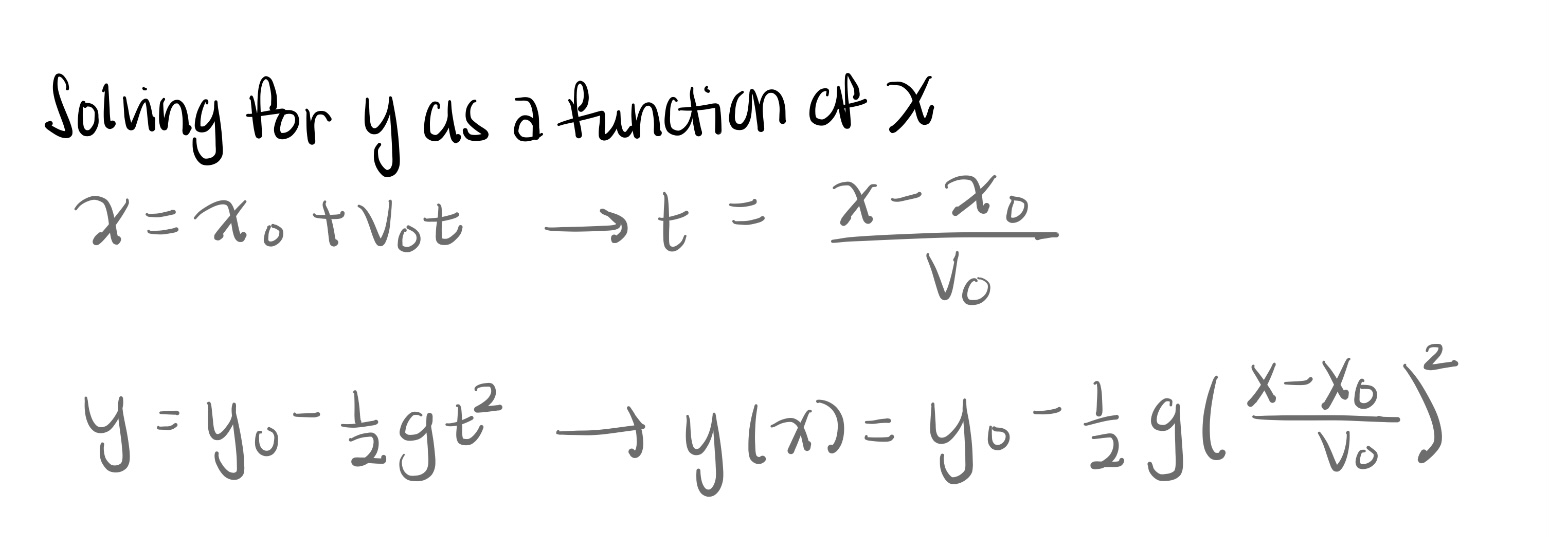

**So, ANS #2 and the final analytical trajectory equation is as follows**:
$$
y(x) = y_0 - \frac{1}{2} g \left( \frac{x - x_0}{v_0} \right)^2
$$


Text(0, 0.5, 'y [m]')

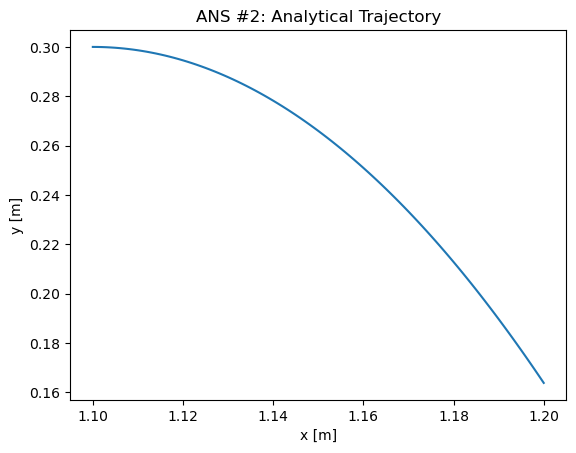

In [12]:
#initialize variables
x0 = 1.1 #x position at time 0
y0 = 0.3 #y position at time 0
v0 = 0.6 #velocity of x at time 0
g = 9.81; #gravity
dx = 0.001; #time step
x = np.arange(1.1, 1.2 + dx, dx)

#analytical trajectory
def f(x):
    return y0 - 0.5*g*((x-x0)/v0)**2

#plot trajectory
plt.plot(x, f(x)) 
plt.title ('ANS #2: Analytical Trajectory')
plt.xlabel('x [m]')
plt.ylabel('y [m]')

## Step 3a: Create a Python function that implements Newton's second order interpolating polynomial and then estimate $y$ at $x=1.125[m]$ using the 3 different points
To create this function, I used the given equation for b0, b1, and b2 and inputed them into the equation for a second order interpolation:
\begin{align*}
f_2(x) &= b_0 + b_1(x - x_0) + b_2(x - x_0)(x - x_1)
\end{align*}

This function takes in the x and y values, interpolates with them and returns the corresponding y value of the given x. I then found the y value for the given x = 1.125 m.

**ANS #3a is the code below**

In [17]:
#arrays containing x and y cooreponding points
xvals_a = [data[0][1], data[4][1], data[8][1]] #for x = 1.11, 1.15, and 1.19 respectively
yvals_a = [data[0][2], data[4][2], data[8][2]] #corresponding y values 0.29, 0.24, 0.15

#definition of polynomial equation using given b0, b1, b2
def poly_2(xData,yData,x):
    b0 = yData[0]
    b1 = (yData[1] - b0) / (xData[1] - xData[0])
    b2 = (yData[2] - b0 - b1*(xData[2] - xData[0]) ) / ( (xData[2] - xData[0])*(xData[2] - xData[1]) )
    func_a = b0 + b1*(x - xData[0]) + b2*(x - xData[0])*(x - xData[1])
    return func_a

result1 = poly_2(xvals_a, yvals_a, 1.125)

print(f"y at x = 1.125 m is ", poly_2(xvals_a, yvals_a, 1.125))

y at x = 1.125 m is  0.2759374999999999


**ANS #3a y at x = 1.125 m is  0.274 m**


## Step 3b: Create a Python function that implements Newton's third order interpolating polynomial and then estimate $y$ at $x=1.125[m]$ using the 4 different points

To create this function, I used the given equation for b0, b1, b2, and b3 and inputed them into the equation for a third order interpolation:

\begin{align*}
f_3(x^3) &= b_0 + b_1(x^3 - x_0) + b_2(x^3 - x_0)(x^3 - x_1) + b_3(x^3 - x_0)(x^3 - x_1)(x^3 - x_2)
\end{align*}

This function takes in the x and y values, interpolates with them and returns the corresponding y value of the given x. I then found the y value for the given x = 1.125 m.

**ANS #3b is below**

In [20]:
xvals_b = [data[1][1], data[3][1], data[5][1], data[7][1]]
yvals_b = [data[1][2], data[3][2], data[5][2], data[7][2]]

def Poly_3(xData,yData,x):   
    b0 = yData[0]
    b1 = (yData[1] - b0) / (xData[1] - xData[0])
    b2 = (yData[2] - b0 - b1*(xData[2] - xData[0]) ) / ( (xData[2] - xData[0])*(xData[2] - xData[1]) )
    b3 = (yData[3] - b0 - b1*(xData[3] - xData[0]) - b2*(xData[3] - xData[0])*(xData[3] - xData[1]) ) / ( (xData[3] - xData[0])*(xData[3] - xData[1])*(xData[3] - xData[2]) )
    func_b = b0 + b1*(x - xData[0]) + b2*(x - xData[0])*(x - xData[1]) + b3*(x - xData[0])*(x - xData[1])*(x - xData[2])
    return func_b

result2 = poly_2(xvals_b, yvals_b, 1.125)
print(f"y at x = 1.125 m is " ,result2)

y at x = 1.125 m is  0.27593750000000006


**ANS #3b y at x = 1.125 m is  0.276**

## Step 4: Estimate the X_SPEED, Y_SPEED, ALPHA, and PRESSURE at point $(x,y)=(1.14[m],0.28[m])$ using the bilinear interpolation. 

After obtaining the correct database file, I split the data between the rows that contained data for a Y position corresponding to 0.27 and those corresponding to 0.29. These are our data1 and data2 sets. These two data were used to get the points above and below 0.28 so that we can zero in on a final point, which is what bilinear interpolation does. I then 3 different first order interpolations on the data. First on (x1,y1) and (x1,y2) and then on (x1,y1) and (x2,y1). Lasly, I ran a interpolation on the outputs of those data to get a final estimation. 

In [19]:
# To create 'DB2.db' file into your computer
conn = sqlite3.connect('DB2.db') 
print("----------Opened database successfully----------")

# Cursor allow us to send SQL statements to a SQLite database
cursor = conn.cursor()  

# Extract rows where Y_POSITION = 0.27
cursor.execute('SELECT * FROM BILINEAR WHERE Y_POSITION = "0.27"')
data1 = cursor.fetchall()

# Extract rows where Y_POSITION = 0.29
cursor.execute('SELECT * FROM BILINEAR WHERE Y_POSITION = "0.29"')
data2 = cursor.fetchall()

#first linear interpolation
def poly_1(xData,yData,x):
    b0 = yData[0]
    b1 = (yData[1] - b0) / (xData[1] - xData[0])    
    func_1 = b0 + b1 * (x - xData[0])    
    return func_1

#intiailize variables
xpos = [data1[0][1], data1[1][1]] #x_positions
ypos = [data1[0][2], data2[0][2]] #y_positions for interpolation along y axis

#X_SPEED 
xspeed1 = [data1[0][3], data1[1][3]] #x_speeds
xspeed_est1 = poly_1(xpos, xspeed1, 1.14) #estimation of speed for position 1.14 using lower data points

xspeed2 = [data2[0][3], data2[1][3]] 
xspeed_est2 = poly_1(xpos, xspeed2, 1.14) #estimation of speed for position 1.14 using upper data points

xspeed_est_list = [xspeed_est1, xspeed_est2] #estimated xspeed values

xspeed_final = poly_1(ypos, xspeed_est_list, 0.28) #use estimations to calculate xspeed at y=0.28
print(f"Estimated x speed at point (1.14, 0.28): {xspeed_final} m/s")

#Y_SPEED

yspeed1 = [data1[0][4], data1[1][4]] #y_speeds
yspeed_est1 = poly_1(xpos, yspeed1, 1.14)  #estimation of speed for position 1.14 using lower data points

yspeed2 = [data2[0][4], data2[1][4]]
yspeed_est2 = poly_1(xpos, yspeed2, 1.14) #estimation of speed for position 1.14 using upper data points

yspeed_est_list = [yspeed_est1, yspeed_est2] #estimated yspeed values
yspeed_final = poly_1(ypos, yspeed_est_list, 0.28) #use estimations to calculate yspeed at y=0.28
print(f"Estimated y speed at point (1.14, 0.28): {yspeed_final} m/s")

#ALPHA

alpha1 = [data1[0][5], data1[1][5]] #alphas
alpha_est1 = poly_1(xpos, alpha1, 1.14) #estimation of speed for position 1.14 using lower data points

alpha2 = [data2[0][5], data2[1][5]]
alpha_est2 = poly_1(xpos, alpha2, 1.14)  #estimation of alpha for position 1.14 using upper data points

alpha_est_list = [alpha_est1, alpha_est2]  #estimated alpha values
alpha_final = poly_1(ypos, alpha_est_list, 0.28) #use estimations to calculate alpha at y=0.28
print(f"Estimated alpha at point (1.14, 0.28): {alpha_final}")

#PRESSURE

pres1 = [data1[0][6], data1[1][6]] #pressure
pres_est1 = poly_1(xpos, pres1, 1.14) #estimation of pressure for position 1.14 using lower data points

pres2 = [data2[0][6], data2[1][6]]
pres_est2 = poly_1(xpos, pres2, 1.14) #estimation of pressure for position 1.14 using upper data points

pres_est_list = [pres_est1, pres_est2]  #estimated pressure values
pressure_final = poly_1(ypos, pres_est_list, 0.28)  #use estimations to calculate pressures at y=0.28
print(f"Estimated pressure at point (1.14, 0.28): {pressure_final} Pa")



----------Opened database successfully----------
Estimated x speed at point (1.14, 0.28): 0.6816666666666665 m/s
Estimated y speed at point (1.14, 0.28): -0.7249999999999998 m/s
Estimated alpha at point (1.14, 0.28): 0.25666666666666693
Estimated pressure at point (1.14, 0.28): -6.720000000000001 Pa


**ANS #4**
Estimated x speed at point (1.14, 0.28): 0.682 m/s <br />
Estimated y speed at point (1.14, 0.28): -0.723 m/s <br />
Estimated alpha at point (1.14, 0.28): 0.257 <br />
Estimated pressure at point (1.14, 0.28): -6.720 Pa <br />